<a href="https://colab.research.google.com/github/RailyaR/project_4/blob/main/online_store4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

*Name* — название игры

*Platform* — платформа

*Year_of_Release* — год выпуска

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий)

*Other_sales*— продажи в других странах (миллионы проданных копий)

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
*Данные за 2016 год могут быть неполными.*

# Инструкция по выполнению проекта

##   Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import seaborn as sns

In [ ]:
games = pd.read_csv('/content/games.csv')

In [ ]:
games


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
print("Число строк в games:", games.shape[0])
print("Число уникальных пользователей:", games['Name'].count())
print("Число дубликатов:", games.duplicated().sum())

Число строк в games: 16715
Число уникальных пользователей: 16713
Число дубликатов: 0


In [ ]:
print("Число строк в games['Year_of_Release']:",games['Year_of_Release'].shape[0])
print("Число уникальных пользователей:", games['Year_of_Release'].count())
print("Число дубликатов:", games['Year_of_Release'].duplicated().sum())

Число строк в games['Year_of_Release']: 16715
Число уникальных пользователей: 16446
Число дубликатов: 16677


In [ ]:
games['NA_sales'].value_counts(dropna=False)

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: NA_sales, Length: 402, dtype: int64

In [ ]:
games['Critic_Score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: Critic_Score, Length: 83, dtype: int64

In [ ]:
games['Year_of_Release'].value_counts(dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [ ]:
games['Rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [ ]:
games['Critic_Score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: Critic_Score, Length: 83, dtype: int64

In [ ]:
games['User_Score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64

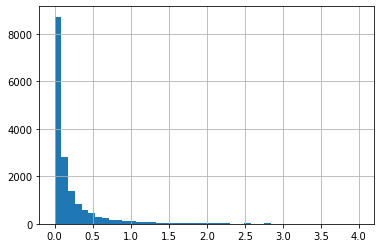

In [ ]:
games['NA_sales'].hist(bins = 45,range=(0, 4))

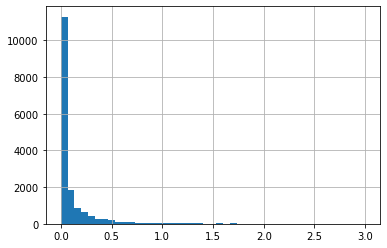

In [ ]:
games['EU_sales'].hist(bins = 45,range=(0, 3))

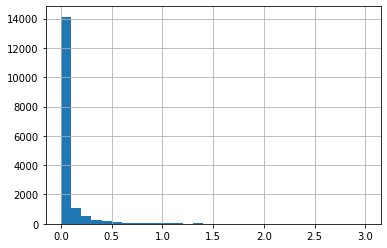

In [ ]:
games['JP_sales'].hist(bins = 30,range=(0, 3))

<b>🎯 Комментарий </b>
    <br /> 
    <br />  Данные выгружены, что можно заметить: 
        
        
* названия столбцов привести к нижнему регистру       
* В таблице всего  16715 строк, в колонках Name,Year_of_Release,Genre,Critic_Score,User_Score,Rating явно есть пропуски с ними что-то нужно сделать
* В колонке Name , Genre можно поставить на Unknown, так как нет сторонних сайтов или сторонней информации, где можно найти недостоющий материал
* В колонке  Year_of_Release  нужно поменять тип на целочисленный
*В колонкax  Critic_Score,User_Score,Rating слишком много NaN  их нельзя заменять медианными значениями так как пойдет искажения данных. 


## Шаг 2. Подготовьте данные


* Замените названия столбцов (приведите к нижнему регистру); </b></font>

In [ ]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 * Преобразуйте данные в нужные типы. 
    Опишите, в каких столбцах заменили тип данных и почему; 
 *Обработайте пропуски при необходимости

In [ ]:
games['name'] = games['name'].fillna('Unknown')

In [ ]:
games.query('name == "Unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
games['genre'] = games['genre'].fillna('Unknown')

In [ ]:
games['year_of_release'].isna().sum() # Посмотрим сколько есть пустых значений 

269

In [ ]:
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
games['year_of_release'].isna().sum() #Пустых значений стало меньше

146

In [ ]:
#меняем в колонке year_of_release на int

games['year_of_release'] = games['year_of_release'].fillna(0).astype('int64')
games['year_of_release'].value_counts(dropna=False)

2008    1440
2009    1431
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     785
2004     765
2012     662
2015     606
2014     582
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
0        146
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [ ]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [ ]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [ ]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


 * Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [ ]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
 11  sales_total      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB



<b>🎯 Комментарий </b>
    <br /> 
    <br />  Выводы:
        
- Были обработаны все пропуски, кроме 'rating' - пока не понятно, как их обработать.
- В столбце name и genre  NaN были заменены на Unknown, как можно заметить  название игры и жанр игры были неизвестны. 
- Имеются пустые значения в столбцах  user_score, critic_score. Были заменены  имеющиеся пустые значения в таблице на -1. Но что интересно в столбце оценка пользователей имелась аббревиатуру 'tbd'.эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено".Поэтому ее можно считать также как и NaN/Поэтому данные NaN  были заменены на -1.
- Была произведена замена year of release на года от той же игры только другой платформы, и был изменен тип.

## Шаг 3. Проведите исследовательский анализ данных

 * Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.


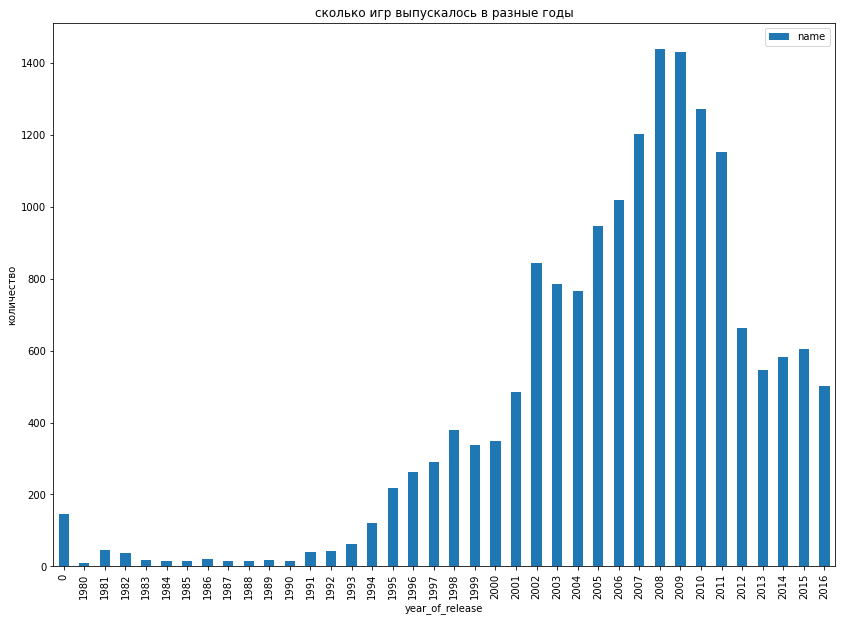

In [ ]:

df =  games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plot = df.plot(kind='bar', y='name', figsize=(14,10))

  
  

plt.ylabel("количество")
plt.xlabel("year_of_release")
plt.title("сколько игр выпускалось в разные годы")
plt.show()

<b>🎯 Комментарий </b>
   <br />  Выводы:
    
        
- Как видно из таблицы с 1980 по 1990 компьютерные игры не были такими популярными, но  когда появились доступные для широкой публики игровые консоли и домашние компьютеры, компьютерные игры становятся частью культуры. Пик приходится на 2008-2009 год.Но со временим начали появлятся мобильные игры, соц.сети  и произошел спад влияния компьютерных игр на жизнь людей.Прогуглив.Выяснилось как раз в начале 2007 году миру была представлена операционная система IOS и в конце 2008 года состоялась презентация Android.Поэтому на графике виден спад консольных игр.

 * Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?.

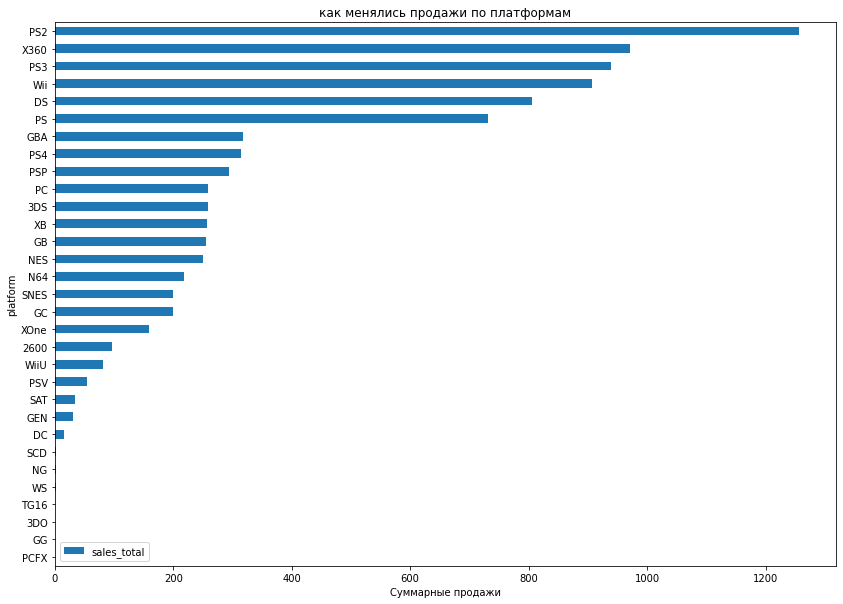

In [ ]:

df_sales_total =  games.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=True)
plot = df_sales_total.plot(kind='barh', y='sales_total', figsize=(14,10))

  
  

plt.ylabel("platform")
plt.xlabel("Cуммарные продажи")
plt.title("как менялись продажи по платформам")
plt.show()

In [ ]:
df_sales_total_new = df_sales_total.reset_index()
top_platforms_list = df_sales_total_new['platform'].unique()
top_platforms_list

array(['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'GEN', 'SAT',
       'PSV', 'WiiU', '2600', 'XOne', 'GC', 'SNES', 'N64', 'NES', 'GB',
       'XB', '3DS', 'PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3',
       'X360', 'PS2'], dtype=object)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


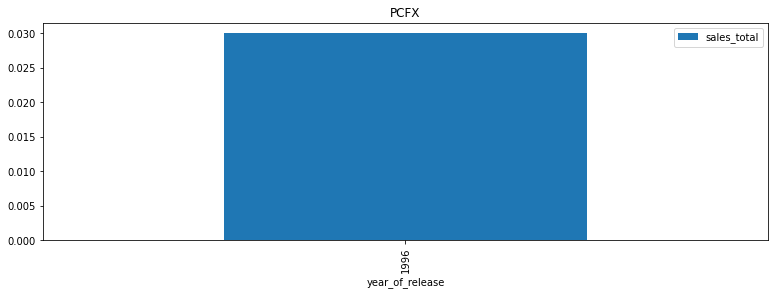

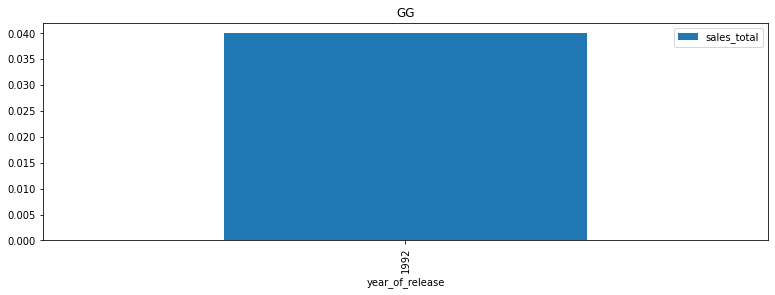

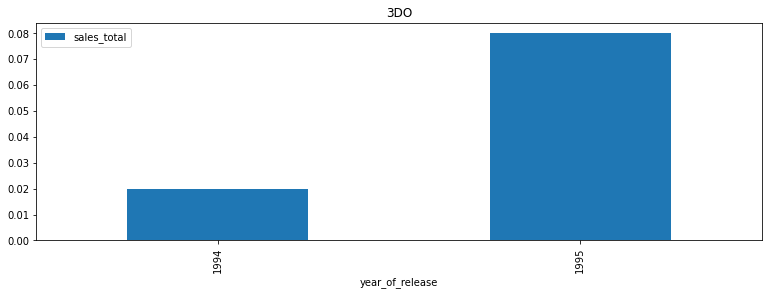

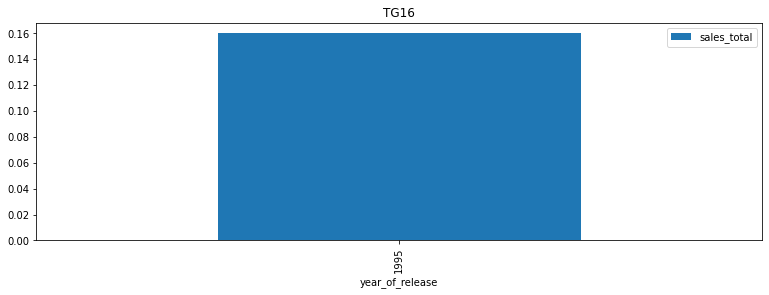

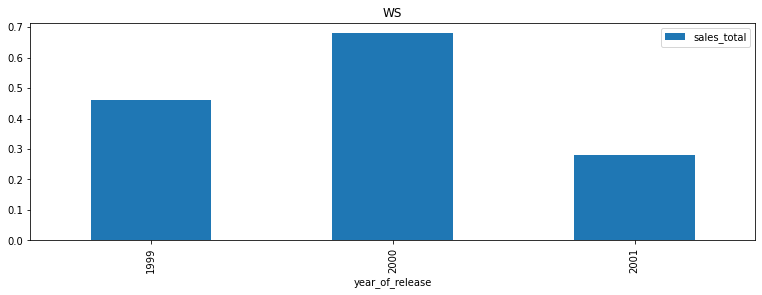

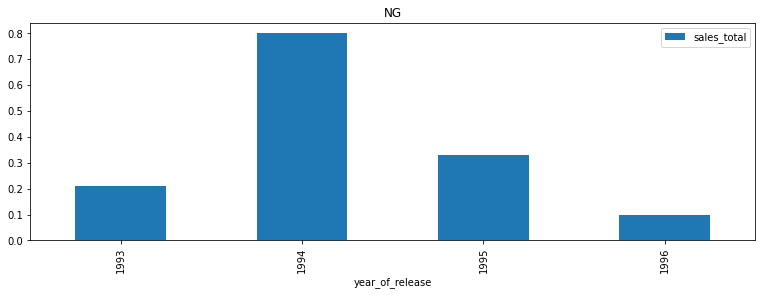

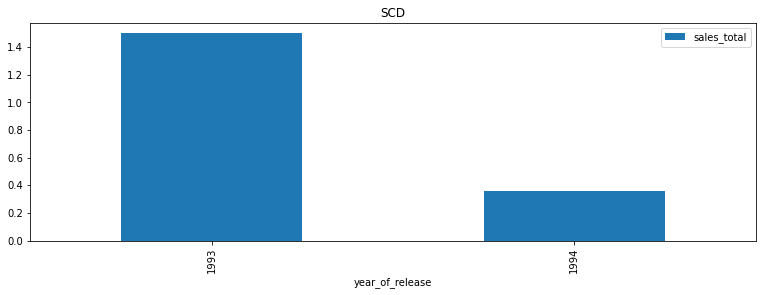

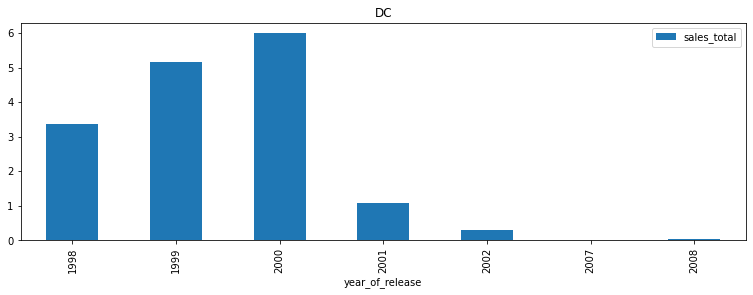

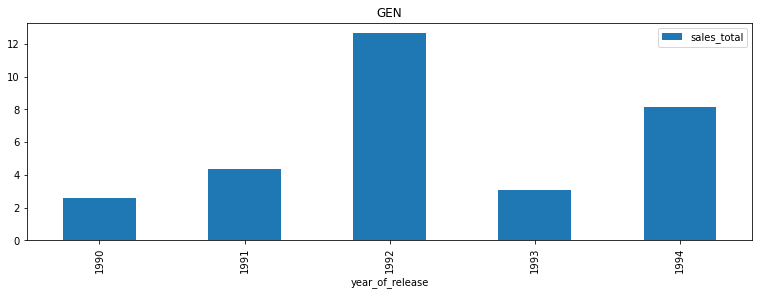

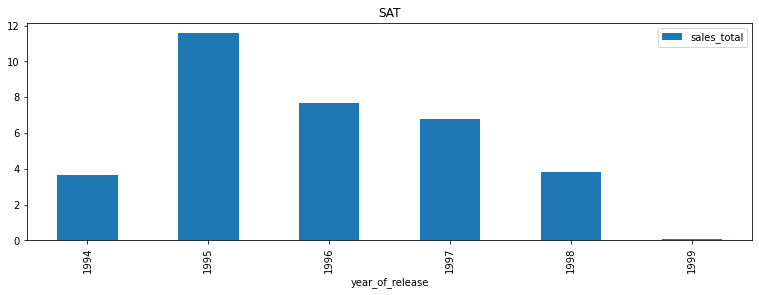

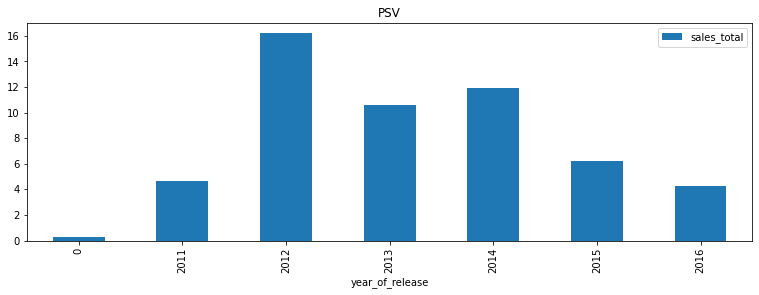

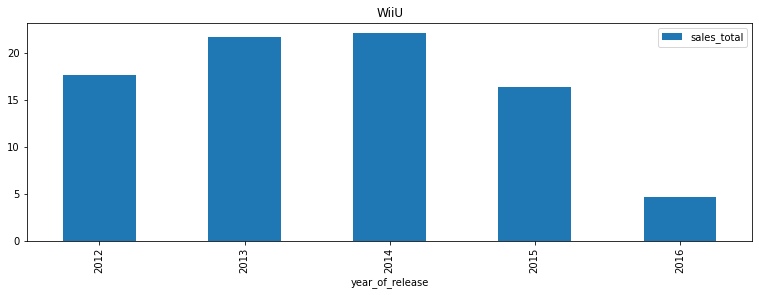

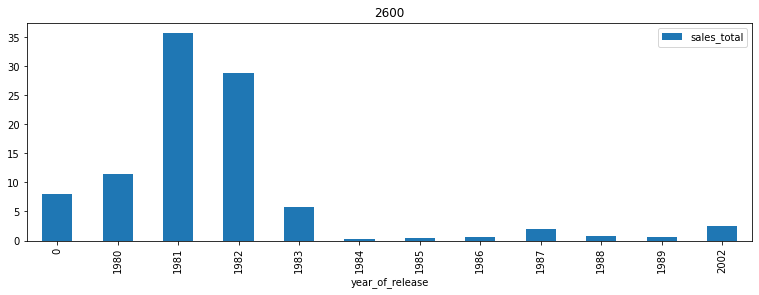

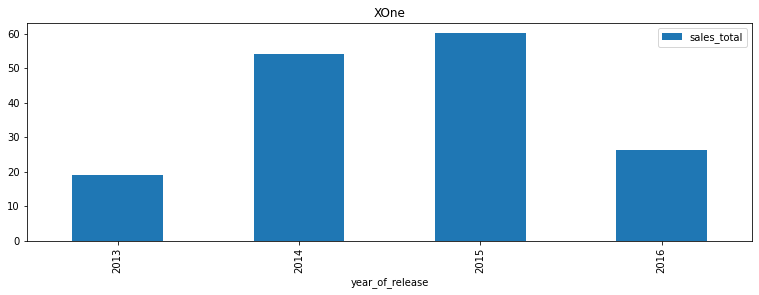

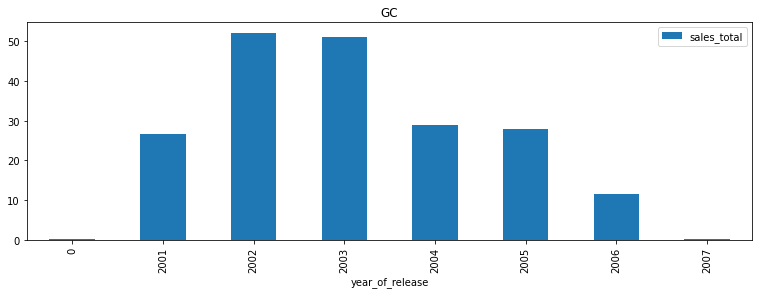

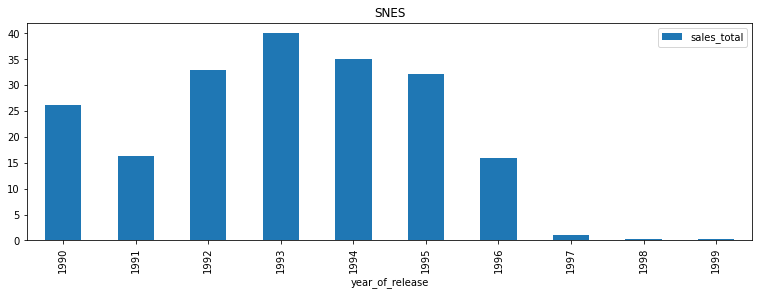

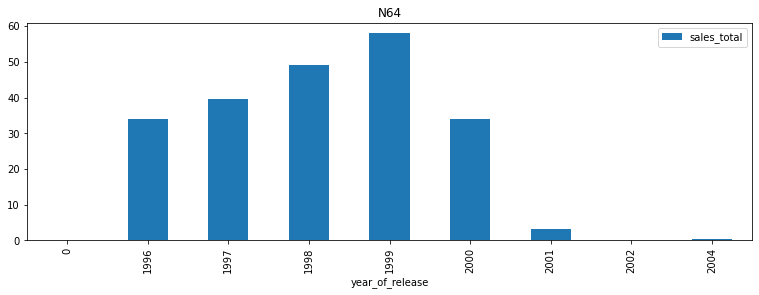

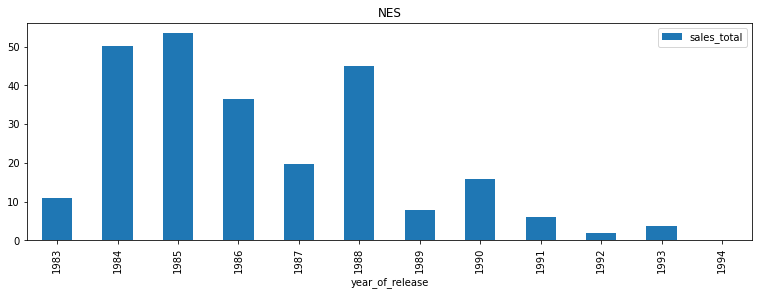

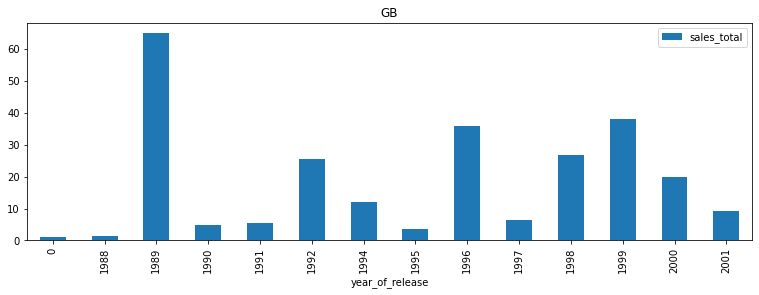

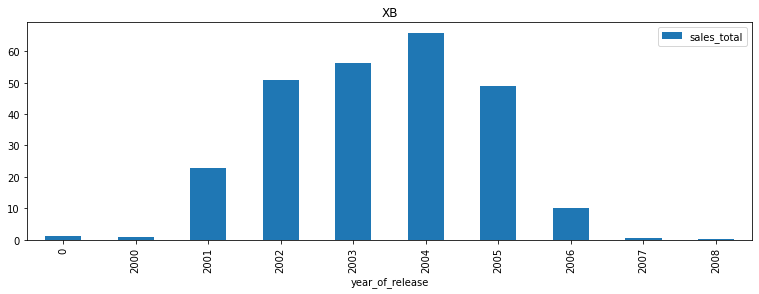

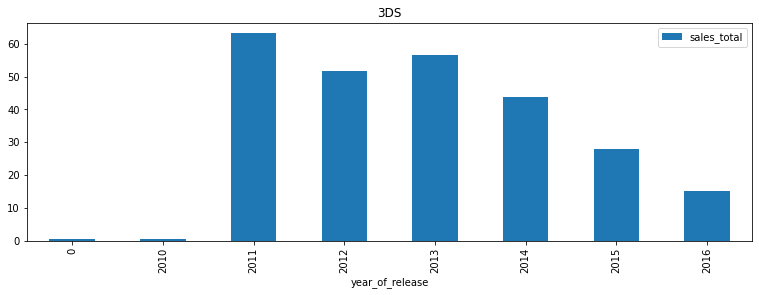

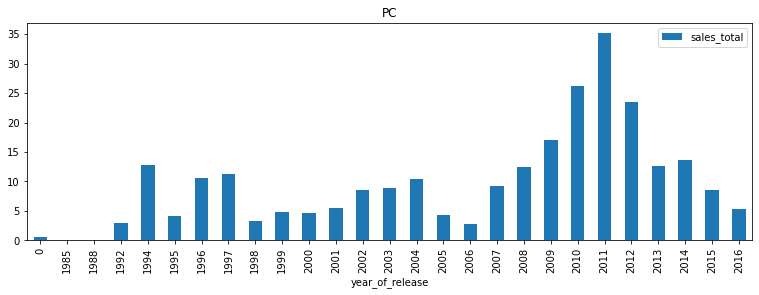

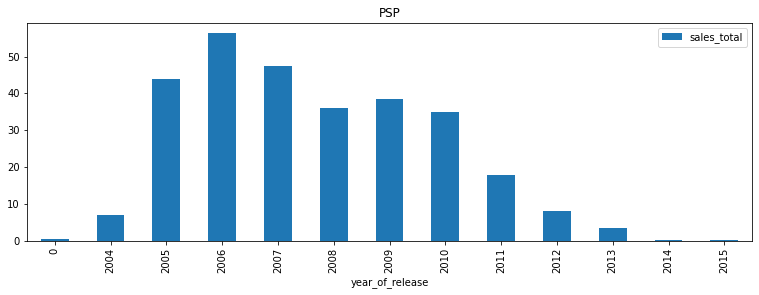

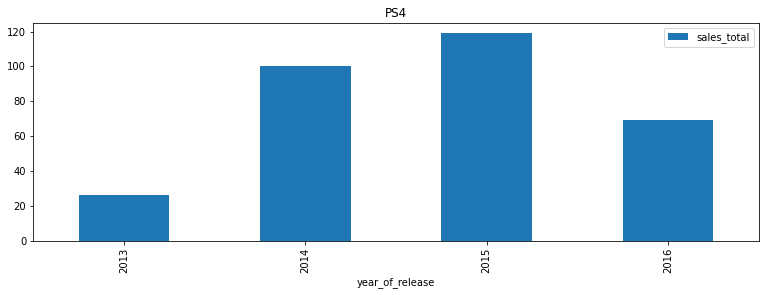

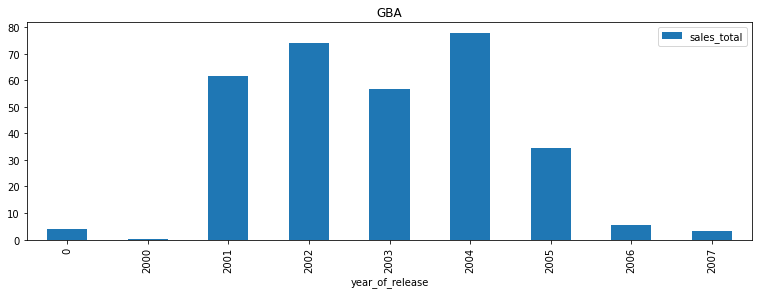

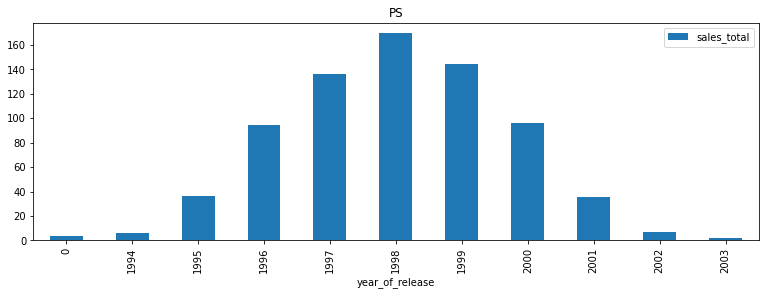

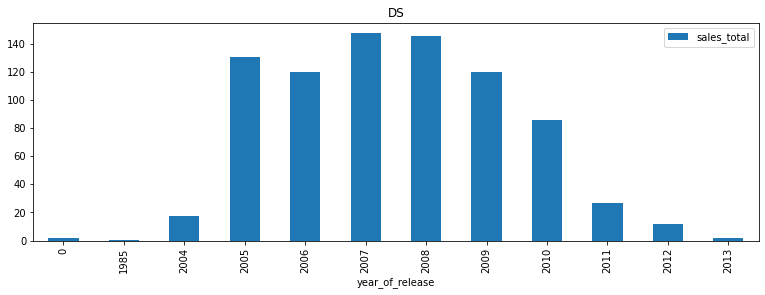

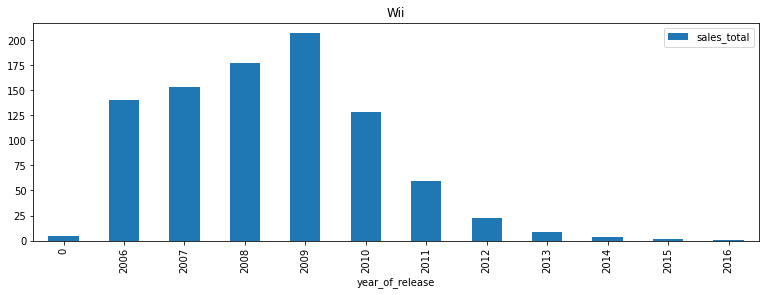

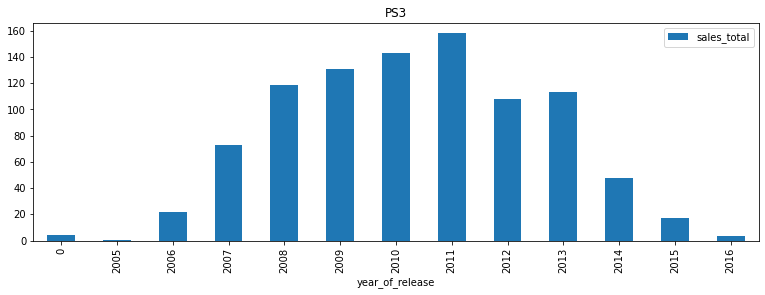

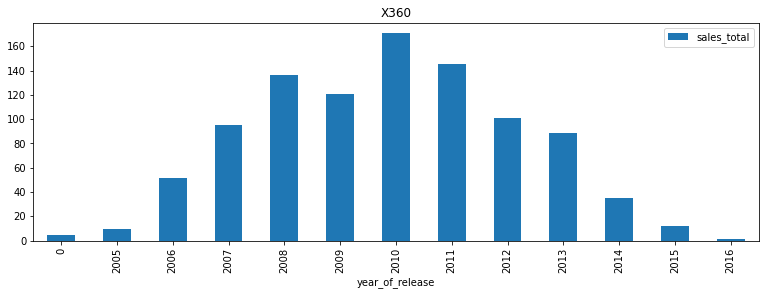

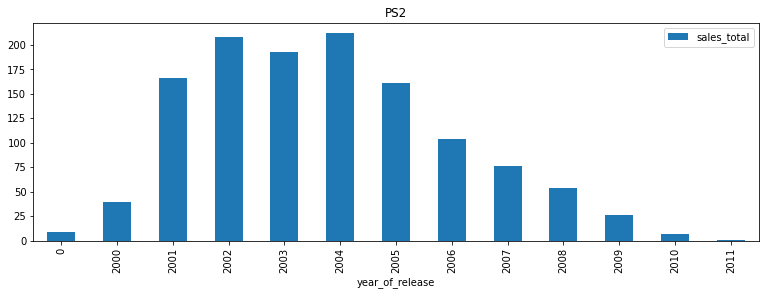

In [ ]:
for platform in top_platforms_list:
    (games[games['platform'] == platform]
    .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
    
    .plot(
        kind='bar', figsize=(13,4)))
    plt.title(platform)

In [ ]:
top_5_platforms = games.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(
    by='sales_total', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms


,platform,sales_total
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


<b>🎯 Комментарий </b>
<br />  Выводы:
    
        
- Как видно из гистограммы "как менялись продажи по платформам", самые высокие продажи были у PS2.На втором месте X360.Два конкурента Sony и Microsoft.
- Средний "Жизненный цикл" игр составляет примерно 6-10 лет.
- К 2016 году на плаву осталисть 6 платформ : 'ps4','xone','pc','wiiu','3ds', 'psv' и и имели достаточно хорошие продажи.

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [ ]:
decline_period_data = games[games['year_of_release'] > 2012]

decline_period_data.head(45)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1.0,-1.0,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [ ]:
games_top_6 = decline_period_data[decline_period_data['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV'])]
games_top_6

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01


In [ ]:
games_top_6_platforms = games_top_6.loc[:,['platform', 'sales_total']]
games_top_6_platforms.sort_values('sales_total', ascending = False).head(25)

,platform,sales_total
31,PS4,14.63
33,3DS,14.60
42,PS4,12.62
47,3DS,11.68
77,PS4,8.58
87,PS4,7.98
92,PS4,7.66
94,PS4,7.60
96,3DS,7.55
99,XOne,7.39


In [ ]:
games_top_6_platforms['sales_total'].describe()

count    1607.00000
mean        0.46944
std         1.14997
min         0.01000
25%         0.03000
50%         0.10000
75%         0.36000
max        14.63000
Name: sales_total, dtype: float64

(0.0, 4.5)

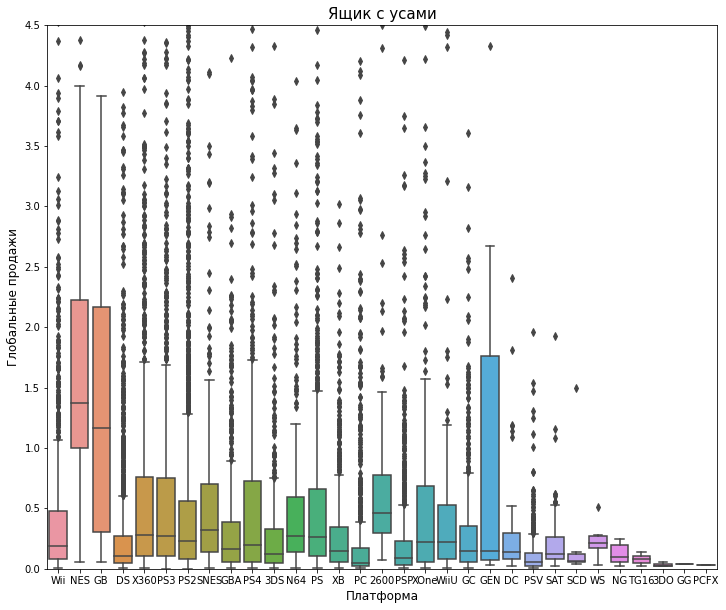

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data=games, x='platform', y='sales_total')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0, 4.5)

In [ ]:
games_top_6_data = games_top_6[games_top_6['year_of_release'] == 2016]
games_top_6_data_platforms =games_top_6_data.loc[:,['platform', 'sales_total','year_of_release']]
games_top_6_data_platforms.sort_values('sales_total', ascending = False).head(25)

,platform,sales_total,year_of_release
94,PS4,7.60,2016
108,3DS,7.14,2016
171,PS4,5.39,2016
245,PS4,4.47,2016
289,PS4,4.07,2016
325,PS4,3.80,2016
571,XOne,2.65,2016
640,XOne,2.42,2016
708,PS4,2.26,2016
709,XOne,2.25,2016


<b>🎯 Комментарий </b>
<br />  Выводы:
    
        
- Самые больште продажи были у PS4,на втором месте XOne.Так показывает график. Медианы у всех разные.

 * Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [ ]:

sony_play_station4 = decline_period_data[decline_period_data['platform']=='PS4'].query('user_score != -1')


sony_play_station4['user_score'].corr(sony_play_station4['sales_total'])

-0.031957110204556424

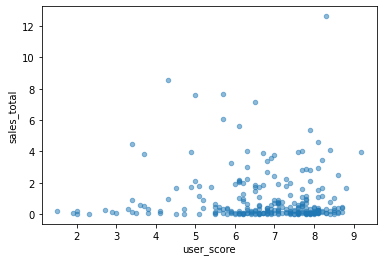

In [ ]:
sony_play_station4.plot.scatter(x='user_score',
                         y='sales_total',
                         alpha=0.5);

In [ ]:

sony_play_station4 =decline_period_data[decline_period_data['platform']=='PS4'].query('critic_score != -1')
sony_play_station4['critic_score'].corr(sony_play_station4['sales_total'])

0.40656790206178095

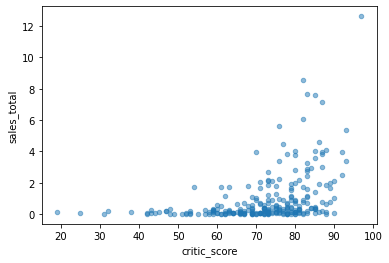

In [ ]:
sony_play_station4.plot.scatter(x='critic_score',
                         y='sales_total',
                         alpha=0.5);

<b>🎯 Комментарий </b>
<br />  Выводы:
    
        
- Корреляция между отзывами простых пользователей и продажами составляет -0.0319, это говрит о том, что зависимости практически нет между отзывами и продажами. Об этом свидетельствует и график с ростом оценки отзова растет и продажа. Но между  оценкой критиков и продажами есть явная зависимость аж 0.406.

 *Соотнесите выводы с продажами игр на других платформах.

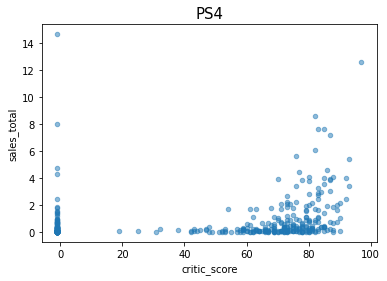

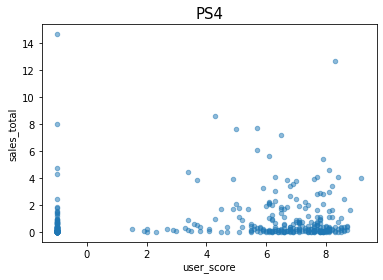

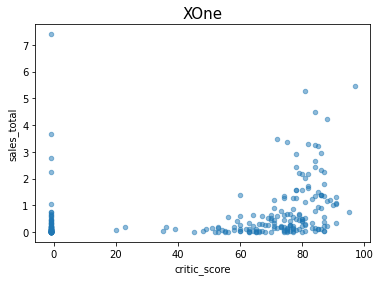

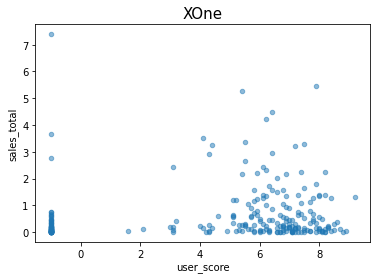

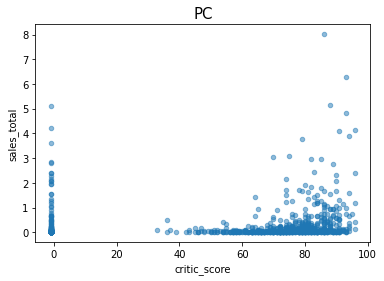

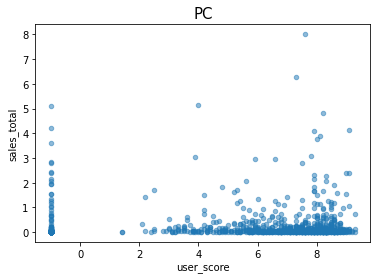

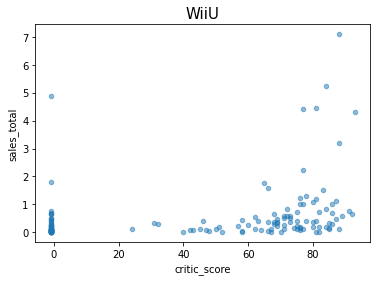

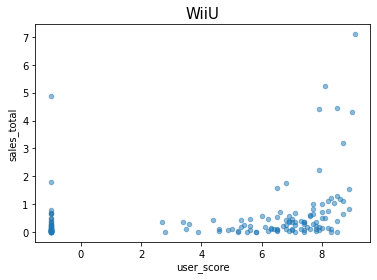

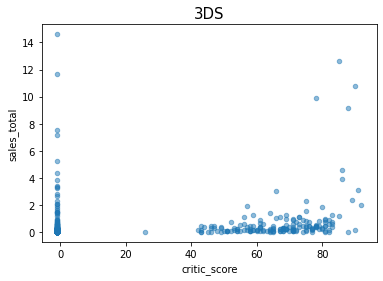

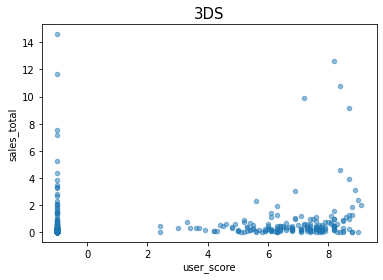

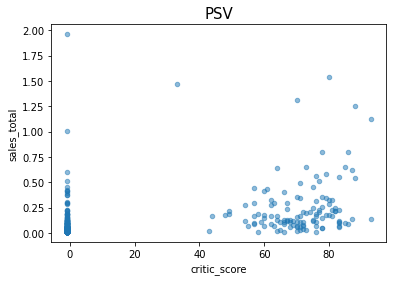

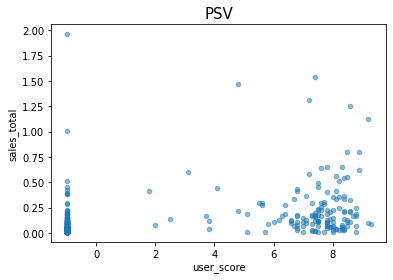

In [ ]:
list_of_top_6 = ['PS4','XOne','PC','WiiU','3DS', 'PSV']

def other_platform_matrix(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    
    
    platform.plot.scatter(x='critic_score',
                          y='sales_total',
                          alpha=0.5);
    plt.title(name_of_platform, fontsize=15)    
    platform.plot.scatter(x='user_score',
                          y='sales_total',
                          alpha=0.5);
    plt.title(name_of_platform, fontsize=15)
        
for platform in list_of_top_6:
            other_platform_matrix(platform) 

<b>🎯 Комментарий </b>
<br />  Выводы:    
- Здесь также явное влиянияе отзывов на продажи.  

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
distr_genre = games_top_6.pivot_table(index='genre', values='sales_total', aggfunc='median')

distr_genre=distr_genre.sort_values(by='sales_total', ascending=False).reset_index()

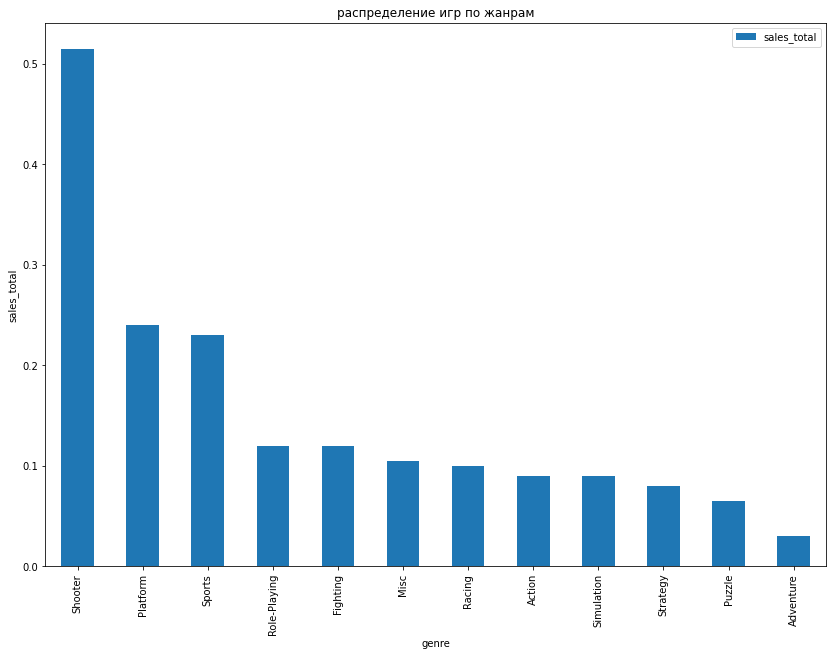

In [ ]:
plot = distr_genre.plot(kind='bar', x='genre', y='sales_total', figsize=(14,10))

  
  

plt.ylabel('sales_total')
plt.xlabel('genre')
plt.title("распределение игр по жанрам")
plt.show()

<b>🎯 Комментарий </b>
    
<br />  Выводы:    
        
-Как и ожидалось puzzle и adventure на последнем месте. Затo shooter на первом. 

## Шаг 4. Составьте портрет пользователя каждого региона

 *Определите для пользователя каждого региона (NA, EU, JP):
    <br />
<br />- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
<br />- Самые популярные жанры (топ-5). Поясните разницу.
<br />- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games_top_6.groupby(groupby).agg({region_sales: 'median'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'green', 'jp_sales': 'indianred'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax],fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

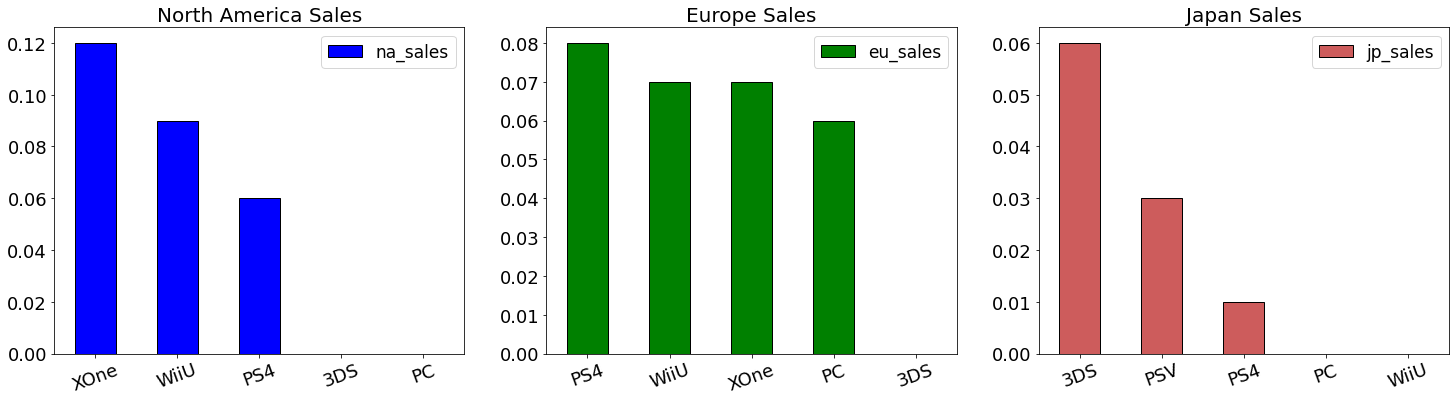

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

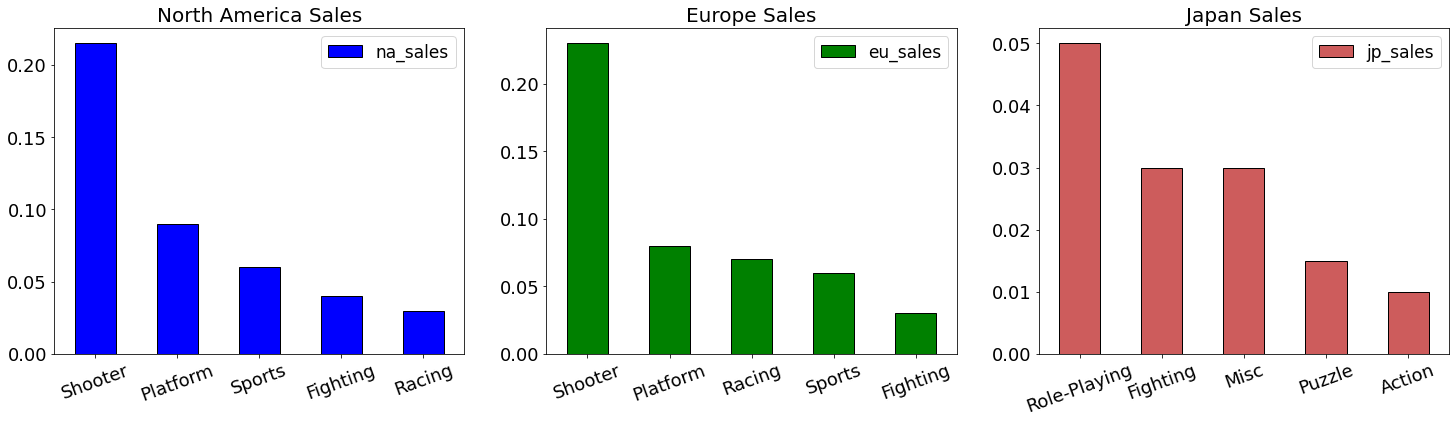

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

<b>🎯 Комментарий </b>
<br />  Выводы:
    
        
- North America Sales : Самая популярная платформа это  Xone, WIIU,PS4. Менее популярная PC.
Europe Sales и люди живущие там чаще играют в PS4,однако на втором месте также   WIIU . Менее популярная 3DS.
- В Japan Sales склыдывается совсем иная тенденция самая популярная платформа это 3DS, менее популярная WIIU . Что касается жанров игр , у Японии все как всегда наоборот.Здесь больше любят играть в ролевые игры, причем с большим отрывом. Далее экшны и тд        
North America Sales : любимый жанр это sh00ter, затем Platform. В Европе аналогично

In [ ]:
games_top_6['rating'] = games_top_6['rating'].fillna('No rating')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ESRB_dict = {'E': 'Для каждого', 'M': 'Старше 17 лет', 'T': 'от 13 лет', 'E10+': 'Всем 10+ лет', 'K-A': 'Только 18+','RP':'Для реклам, рейтинг -', 'E10+': 'Всем 10+ лет','ES': 'Дошкольники', 'No rating':'No rating'}

In [ ]:
games_top_6['ESRB_description'] = games_top_6['rating'].map(ESRB_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


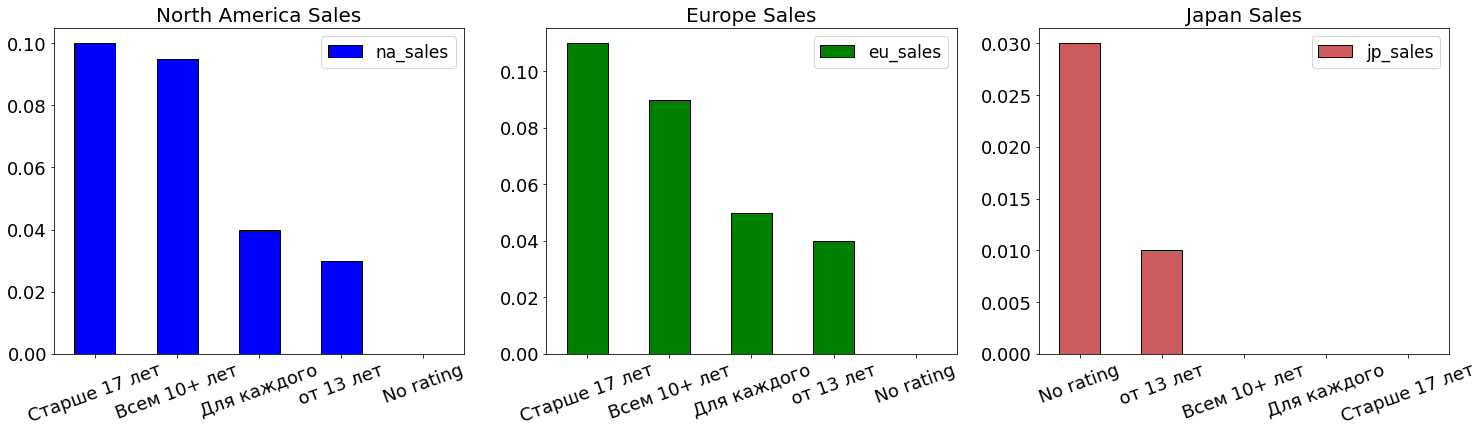

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

<b>🎯 Комментарий </b>
<br />  Выводы:
    
        
- North America Sales : Приобретают больше для детей старше 17 лет , на втором месте для каждого возраста . 
-Europe Sales рейтинг идентичен с North America Sales .
- В Japan Sales как всегда все иначе, больше продаж по рейтенгу для каждого, на втором месте от 13 лет.

## Шаг 5. Проверьте гипотезы

<b> * гипотезы:
    <br />
<br />- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<br />- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


H0  —Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1  — Средние пользовательские рейтинги платформ Xbox One и PC  различаются.

α=0.05%

In [ ]:
Xbox_One = games.query('platform == "XOne"')['user_score']
PC =games.query('platform == "PC"')['user_score']

alpha = .05

results = st.ttest_ind(
    Xbox_One, 
    PC, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0010304276753605973
Отвергаем нулевую гипотезу


In [ ]:
good_stat2 = (
    games
    .pivot_table(index='platform', values='user_score', aggfunc='mean')
)

In [ ]:
good_stat2 = good_stat2.reset_index()

In [ ]:
good_stat2.query('user_score > -1 and (platform == "XOne" or  platform == "PC")')

,platform,user_score
13,PC,5.373819
30,XOne,4.542105


H0  —Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  одинаковые.

H1  — Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  различаются.

α=0.05%

In [ ]:
Action = games.query('genre == "Action"')['user_score']
Sports =games.query('genre == "Sports"')['user_score']

alpha = .05

results = st.ttest_ind(
    Action, 
    Sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1705362926146342e-08
Отвергаем нулевую гипотезу


In [ ]:
good_stat3 = (
    games
    .pivot_table(index='genre', values='user_score', aggfunc='mean')
)
good_stat3 = good_stat3.reset_index()

In [ ]:
good_stat3.query('user_score > -1 and(genre == "Action" or genre == "Sports")')

,genre,user_score
0,Action,3.374859
10,Sports,2.739864


<b>🎯 Комментарий </b>
<br />  Выводы:
    
        
- Была вывдинута гипотеза о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;Но как оказалось при статистическом анализе, это не так, при проверке данная гипотеза тоже была опровергнута . 
- Вторая гипотеза звучала так : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.И это действительно так, Action средняя оценка пользователей 3.37, а вот Sports 2.73

🎯 Комментарий 

*Итоговые выводы:*
    
-  Пик компьютерных игр  приходится  на 2008-2009 год.Но, как появились IOS и  Android проискодит спад консольных игр. 
-  Самые высокие продажи были у PS2.
- К 2016 году на плаву осталисть 6 платформ : 'ps4','xone','pc','wiiu','3ds', 'psv' и и имели достаточно хорошие продажи.
- Зависимость  между отзывами простых пользователей и продажами отсутствует.О Но между  оценкой критиков и продажами есть явная зависимость аж 41%.
- Самая популярная платформа это шутеры и платформ,на последнем месте приключения, заметим, затраты на выпуск шетуров и платформ высокие.
- В в рейтинге игр есть недостоющие данные, которые были заменены на 'No rating', и имеено они влияют на приобретаемость игры. Так как было выяснено, что  в Северной Америке и в Европе данный рейтинг стоит на 2 месте, а в Японии аж на первом. 
- В Северной Америке и в Европе предпочитают больше играть в шутеры или platform(и самая популярная платформа Xone в Северной Америке,а в Европе PS4), в Японии напротив больше приобретают игры связанные с ролями(Ролевые игры)(популярная платформа является 3DS). 
Поэтому потенциально популярный продукт в Северной Америке и в Европе является PS4, однако в Японии 3DC. 
- Рынок консольных игр постепенно падает, постепенно падает, даже 3DC, (как говрит гугл) в 2013 году чуть не вышел из игры, потому что сейчас все гоняются за новыми технологиями, графикой и тд.Но, к сожалению, не ценят идею и  замысел игры.
